In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re
from glob import glob
import pandas as pd
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.
    Format specification: http://netpbm.sourceforge.net/doc/pgm.html
    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

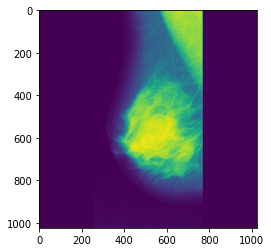

In [28]:
# load a single image
plt.imshow(read_pgm(glob('data/pgms/*.pgm')[0]))

In [10]:
all_cases_df = pd.read_table('data/Info.txt', delimiter=' ')
all_cases_df = all_cases_df[all_cases_df.columns[:-1]] # drop last column
all_cases_df['path'] = all_cases_df['REFNUM'].map(lambda x: '%s.pgm' % x)
all_cases_df.sample(3)

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS,path
23,mdb023,G,CIRC,M,538.0,681.0,29.0,mdb023.pgm
315,mdb308,F,NORM,NaN,NaN,NaN,NaN,mdb308.pgm
72,mdb072,G,ASYM,M,266.0,517.0,28.0,mdb072.pgm


In [21]:
all_cases_df['CLASS'].value_counts()

NORM    207
CALC     30
CIRC     25
SPIC     19
ARCH     19
MISC     15
ASYM     15
Name: CLASS, dtype: int64

In [27]:
np.mean(all_cases_df.RADIUS)

48.84873949579832

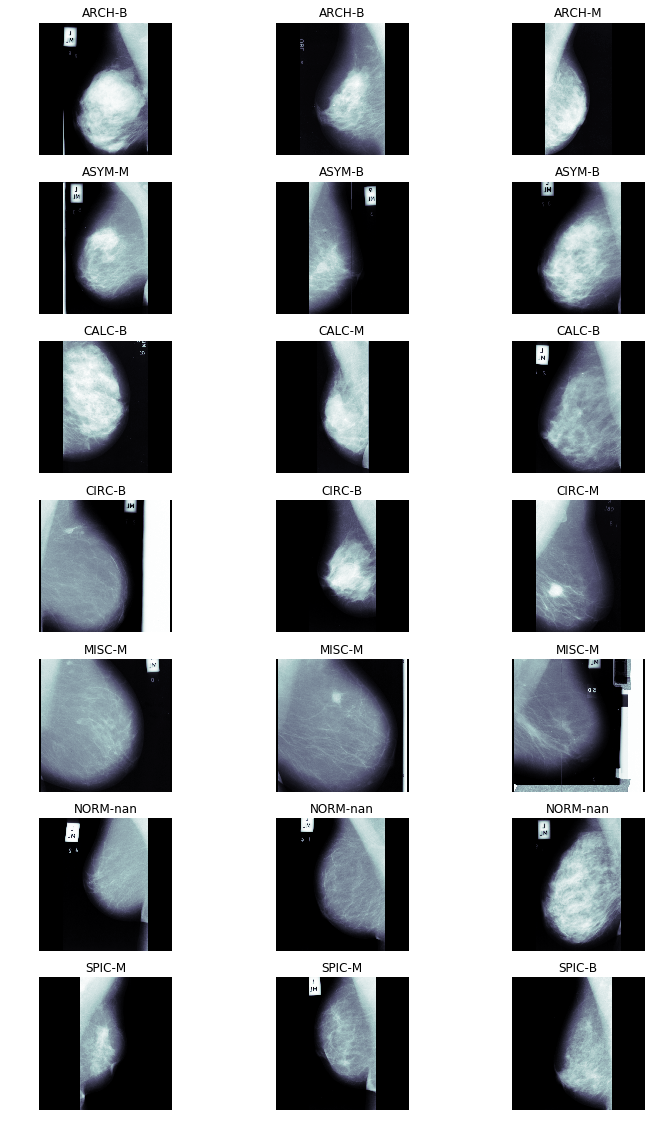

In [14]:
sample_count = 3
fig, m_axs = plt.subplots(len(all_cases_df['CLASS'].value_counts()), 3, figsize = (12, 20))
for c_axs, (c_cat, c_df) in zip(m_axs, all_cases_df.groupby('CLASS')):
    for c_ax, (_, c_row) in zip(c_axs, c_df.sample(sample_count).iterrows()):
        c_ax.imshow(read_pgm('data/pgms/' + c_row['path']), cmap = 'bone')
        c_ax.axis('off')
        c_ax.set_title('{CLASS}-{SEVERITY}'.format(**c_row))


## Scans

In [4]:
# import the data
with h5py.File('data/all_mias_scans.h5', 'r') as scan_h5:
    bg_info = scan_h5['BG'][:]
    class_info = scan_h5['CLASS'][:]
    # low res scans
    scan_lr = scan_h5['scan'][:][:, ::16, ::16]

In [18]:
# flatten vectors
scan_lr_flat = scan_lr.reshape((scan_lr.shape[0], -1))

In [20]:
scan_lr_flat.shape

(330, 4096)

In [16]:
# process labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
class_le.fit(class_info)
class_vec = class_le.transform(class_info)
class_le.classes_

array([b'ARCH', b'ASYM', b'CALC', b'CIRC', b'MISC', b'NORM', b'SPIC'],
      dtype='|S4')

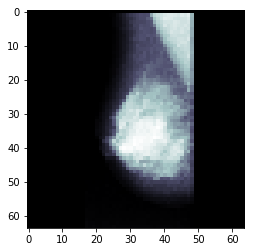

In [17]:
plt.imshow(scan_lr[0], cmap = 'bone')

In [31]:
scan_lr[0].shape

(64, 64)